In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import scipy as sp
import scipy.stats
import statsmodels.api as sm
import sklearn as sk
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)


### 6.1 로지스틱 회귀분석
```
로지스틱(Logistic) 회귀분석은 회귀분석이라는 명칭과 달리 회귀분석 문제와 분류문제 모두에 사용할 수 있다. 
로지스틱 회귀분석 모형에서는 종속변수가 이항분포를 따르고 그 모수  μ 가 독립변수  x 에 의존한다고 가정한다.
```

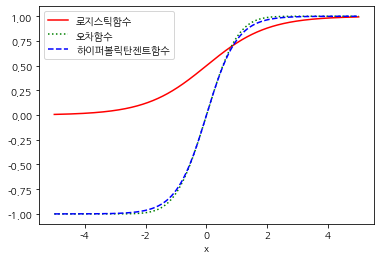

In [3]:
# 시그모이드 함수
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱함수")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

In [9]:
# 다음과 같은 1차원 독립변수를 가지는 분류문제를 풀어보자.

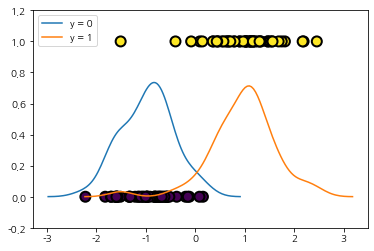

In [10]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [11]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0) 
#disp=0 수치적 최적화 => 수치적 최적화를 보여줄건지 말건지
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.7679
Time:                        17:00:28   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [12]:
# μ(x)=σ(4.2382x+0.2515)가 판별함수 수식이 됨.
# 유의확률을 감안하면 상수항 실질적으로 0이지만 predict메서드 사용하면
# 유의확률 감안하지 않기떄문에 μ(x)=σ(4.2382x+0.2515)가 판별함수 수식 됨

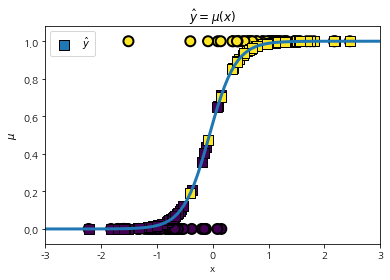

In [13]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

### 판별함수
```
Logit 모형의 결과 객체에는 fittedvalues라는 속성으로 판별함수  z=wTx  값이 들어가 있다. 
이 값을 이용하여 분류문제를 풀 수도 있다.
판별함수값 -> ROC커브를 그릴수 있음 (decision 값의 threshold를 기준값을 0으로 둘건지..)
```

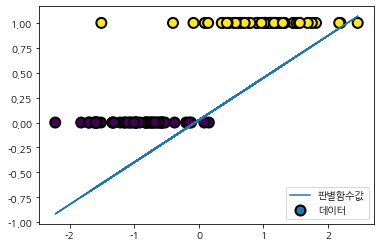

In [14]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

### 로지스틱 회귀 성능 측정

#### 로그 손실함수

In [15]:
# 위 모형의 log loss
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

In [16]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [17]:
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

In [18]:
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

### Scikit-Learn 패키지의 로지스틱 회귀
Scikit-Learn 패키지는 로지스틱 회귀 모형 LogisticRegression 를 제공한다.

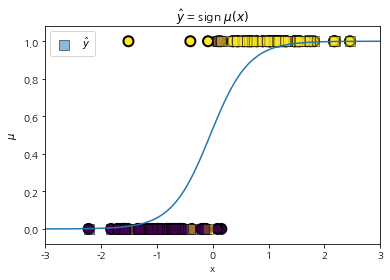

In [19]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()

#### 연습 문제 1
```
1. 붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 
    StatsModels 패키지의 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 
    이 보고서에서 어떤 값이 세토사와 베르시칼라를 구분하는 기준값(threshold)으로 사용되고 있는가?
2. 위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 
    이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.
```

In [33]:
iris=load_iris()
idx=np.in1d(iris.target,[0,1])
x0=iris.data[idx,:1]
x=sm.add_constant(x0)
y=iris.target[idx]

In [36]:
logit_mod=sm.Logit(y,x)
logit_res=logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.5368
Time:                        18:11:14   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [39]:
logit_res.params

array([-27.83145099,   5.14033614])

In [40]:
-logit_res.params[0]/logit_res.params[1]

5.41432510257189

In [41]:
y_pred=logit_res.predict(x)>=0.5

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, logit_res.predict(x))

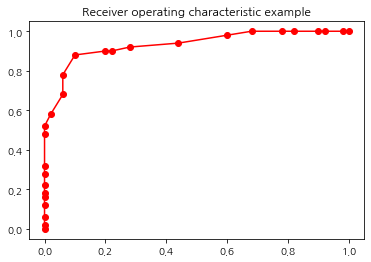

In [55]:
plt.plot(fpr, tpr, 'or-', label="Logistic Regression")
plt.title('Receiver operating characteristic example')
plt.show()

In [59]:
# 확률값이 아닌 예측된값으로 ROC를 그리면 이렇게 됨
# 0% ,중간, 100% 이것만 나오게 되는것 값이 0또는 1밖에 없으니 
# 그러므로 0~1사이의 값인 .predict를 사용해야함
fpr, tpr, thresholds = roc_curve(y, y_pred)

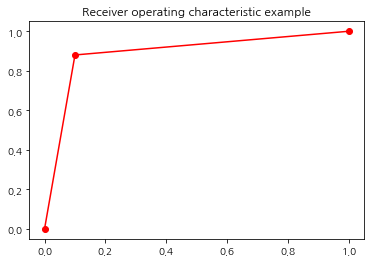

In [58]:
plt.plot(fpr, tpr, 'or-', label="Logistic Regression")
plt.title('Receiver operating characteristic example')
plt.show()

### 로지스틱 회귀를 사용한 이진 분류의 예
다음 데이터는 미국 의대생의 입학관련 데이터이다.

In [60]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


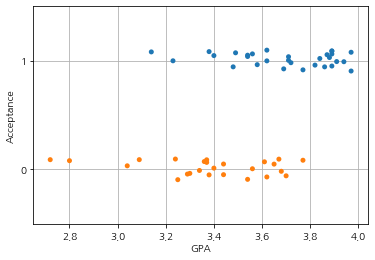

In [61]:
# GPA와 Acceptance(합격)의 관계
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [62]:
# MCAT = VR + PS + WS + BS이므로 이 MCAT은 독립 변수에서 제외해야 한다.

In [63]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.5913
Time:                        19:06:56   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

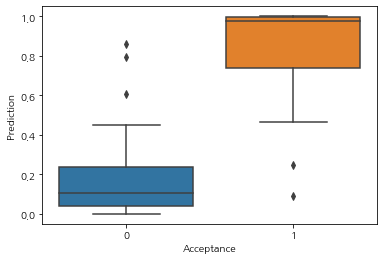

In [64]:
# 실제와 예측결과 비교
# 저 아웃라이어들은 실제 합격했는데 불합격으로 예측했거나
# 불합격했는데 합격으로 예측한것 
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

In [65]:
# 유의확률을 확인하여 가장 유의한 변수만 넣어 모형 수정
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.3315
Time:                        19:09:22   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

In [66]:
# 위 결과를 바탕으로 다음 점수가 15.5427보다 크면 합격이라고 예측할 수 있다.

#### 연습 문제 2
1. 붓꽃 분류문제에서 클래스가 베르시칼라(versicolor)와 버지니카(virginica) 데이터만 사용하여(versicolor=0, virginica=1) 
    로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 독립변수는 모두 사용한다. 
    이 보고서에서 버지니카와 베르시칼라를 구분하는 경계면의 방정식을 찾아라.
2. 위 결과를 분류결과표와 분류결과보고서로 나타내라.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구하라. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [68]:
iris=load_iris()
idx=np.in1d(iris.target,[1,2])
x0=pd.DataFrame(iris.data[idx,:],columns=iris.feature_names[:])
x=sm.add_constant(x0)
y=iris.target[idx]-1

In [70]:
logit_mod=sm.Logit(y,x)
logit_res=logit_mod.fit(disp=0)
print(logit_res.summary())
# from_formula는 이름을 바꾸고 써야함 ()가 인식이 안됨

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.9142
Time:                        11:09:49   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal length (cm)    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal width (cm)     -6.

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, logit_res.predict(x))

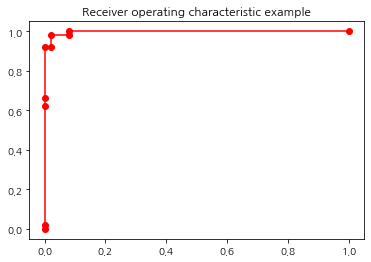

In [72]:
plt.plot(fpr, tpr, 'or-', label="Logistic Regression")
plt.title('Receiver operating characteristic example')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, logit_res.predict(x))

plt.plot(fpr, tpr, 'or-', label="Logistic Regression")
plt.title('Receiver operating characteristic example')
plt.show()

### 로지스틱 회귀를 사용한 회귀분석
```
로지스틱 회귀는 분류문제뿐만 아니라 종속변수  y 가 0부터 1까지 막혀있는 회귀분석 문제에도 사용할 수 있다. 
이때는 다음처럼  μ  값을 종속변수 y의 예측값으로 사용한다.
```

In [73]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


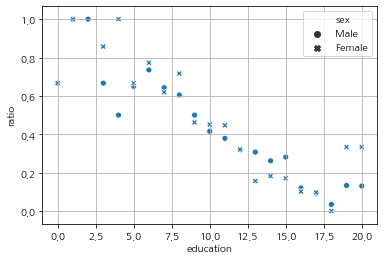

In [74]:
# ratio이지만 0~1로 스케일링이 되어있는 데이터
# 0~100으로 되어있는경우 나누기 100해서 스케일링을 수동으로 해줘야함
# scale쓰는건 평균이 0, 표준편차가 1로 만들어주는것
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

In [75]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.3435
Time:                        11:21:19   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [77]:
# 성별은 유의하지 않다는 것을 알게되었으므로 성별을 제외하고 다시 모형을 구한다.

In [78]:
model_wrole2 = sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 May 2020   Pseudo R-squ.:                  0.3422
Time:                        11:21:34   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

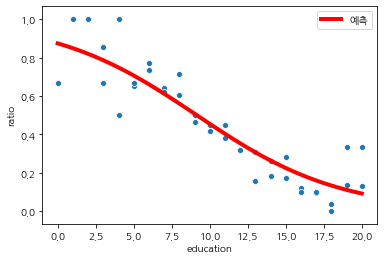

In [79]:
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="예측")
plt.legend()
plt.show()